In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import os

# Create folder if it doesn't exist
if not os.path.exists('img'):
    os.makedirs('img')

plt.rcParams['font.family'] = 'DejaVu Sans'  # Or any other Farsi-compatible font installed
color_pallet = ['#8B0000', '#FF0000', '#FFFF00', '#00FF7F', '#008000']
result_label = ['هرگز انجام نده', 'انجام نده', 'اختیار با توست', 'انجام بده', 'حتما انجام بده']


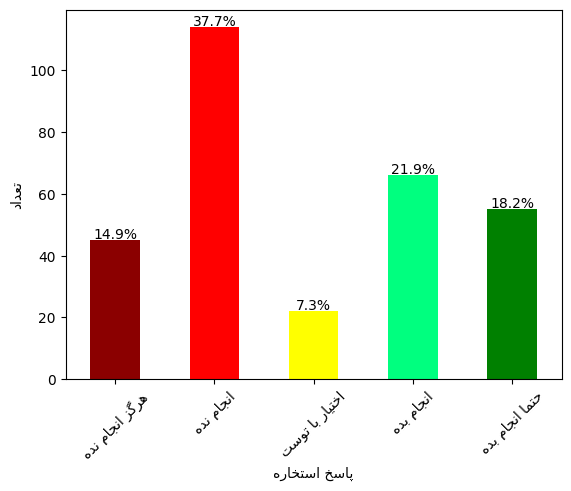

In [2]:
# Read the CSV file
df = pd.read_csv('data/data.csv')

# Draw histogram based on a category
summary = df[['category', 'result']].value_counts().sort_index()
# make summary a DataFrame
summary = summary.reset_index()
# pass the column of colors to the summary DataFrame -2 danger red, -1 red but lighter, 0 neutral yellow, 1 green but lighter, 2 success green
# use rgb 6 digit hex code
summary['color'] = color_pallet
# draw summary by color and x axis label is result and y axis label is count
summary['count'].plot(kind='bar', color=summary['color'])
labels = [get_display(arabic_reshaper.reshape(label)) for label in summary['result']]
plt.xticks(ticks=range(len(summary['result'])), labels=labels, rotation=45)
plt.xlabel(get_display(arabic_reshaper.reshape('پاسخ استخاره')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد')))
# add the percentage of each bar
for i in range(len(summary['result'])):
    plt.text(i, summary['count'][i] + 0.5, f'{summary["count"][i] / summary["count"].sum() * 100:.1f}%', ha='center')
# save the image
plt.savefig('img/avini_categories.png')
plt.show()

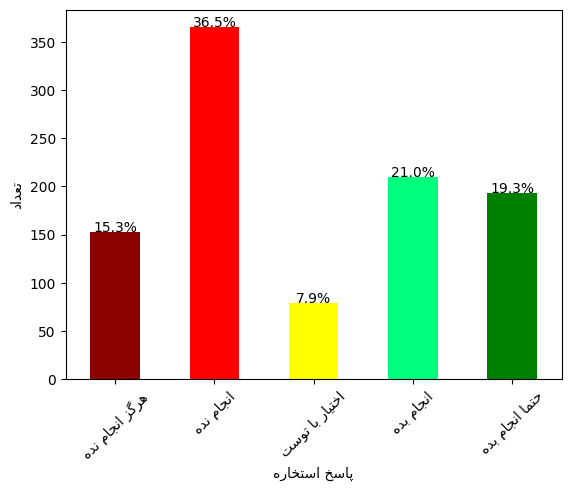

In [3]:
# Read the CSV file
df = pd.read_csv('data/output.csv')
# Draw histogram based on a category
out = df[['category']].value_counts().sort_index()
# make out a DataFrame
out = out.reset_index()
# pass result_label to the out DataFrame
out['result'] = result_label
# pass color_pallet to the out DataFrame
out['color'] = color_pallet

# draw out by color and x axis label is result and y axis label is count
out['count'].plot(kind='bar', color=out['color'])
labels = [get_display(arabic_reshaper.reshape(label)) for label in out['result']]
plt.xticks(ticks=range(len(out['result'])), labels=labels, rotation=45)
plt.xlabel(get_display(arabic_reshaper.reshape('پاسخ استخاره')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد')))

# add the percentage of each bar
for i in range(len(out['result'])):
    plt.text(i, out['count'][i] + 0.5, f'{out["count"][i] / out["count"].sum() * 100:.1f}%', ha='center')
# save the plot in img folder
plt.savefig('img/test_result.png')
plt.show()